In [ ]:
import tensorflow as tf
tf. version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
imagesize=[224,224]
train_path='/content/drive/MyDrive/EYE DISEASE/TRANING SET'
test_path='/content/drive/MyDrive/EYE DISEASE/TESTING SET'

In [ ]:
train_datagen=ImageDataGenerator(width_shift_range=0.3,horizontal_flip=True,
                                 #preprocessing_function=preprocess_input,
                                 rescale=1./255,shear_range=0.2,zoom_range=0.2,)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=10,
    class_mode='categorical',
    shuffle=True
)

#load testing set
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=10,
    class_mode='categorical',
    shuffle=True
)


Found 211 images belonging to 6 classes.
Found 83 images belonging to 6 classes.
Shape of train_images: (10, 224, 224, 3)
Shape of train_labels: (10, 6)


In [ ]:
#@title Buliding Custom CNN Model
model = Sequential([
    Conv2D(128, kernel_size=(3, 3),input_shape= (224,224,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(4, activation='softmax')
])

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
        )

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,
    steps_per_epoch=15, # Number of batches from the training set per epoch
    validation_steps=5    # Number of batches from the test set per epoch for validation
)


Epoch 1/30
15/15 [==============================] - 75s 4s/step - loss: 12.6591 - accuracy: 0.3333 - val_loss: 9.8435 - val_accuracy: 0.4000
Epoch 2/30
15/15 [==============================] - 38s 3s/step - loss: 7.2882 - accuracy: 0.4539 - val_loss: 3.8164 - val_accuracy: 0.7200
Epoch 3/30
15/15 [==============================] - 46s 3s/step - loss: 3.5686 - accuracy: 0.7092 - val_loss: 5.7867 - val_accuracy: 0.5400
Epoch 4/30
15/15 [==============================] - 45s 3s/step - loss: 3.8305 - accuracy: 0.6738 - val_loss: 9.0113 - val_accuracy: 0.5800
Epoch 5/30
15/15 [==============================] - 37s 3s/step - loss: 4.7554 - accuracy: 0.6950 - val_loss: 7.7687 - val_accuracy: 0.5400
Epoch 6/30
15/15 [==============================] - 34s 2s/step - loss: 3.9955 - accuracy: 0.7021 - val_loss: 5.9399 - val_accuracy: 0.6000
Epoch 7/30
15/15 [==============================] - 34s 2s/step - loss: 2.5873 - accuracy: 0.7518 - val_loss: 4.5278 - val_accuracy: 0.7000
Epoch 8/30
15/15 [=

In [ ]:
from tensorflow.keras.models import save_model
save_model(model, "EYE_MODEL.h5")

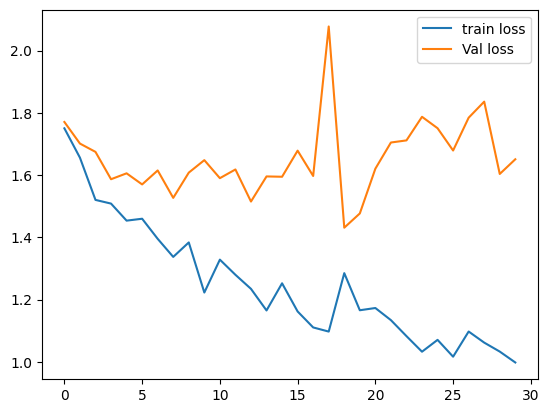

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

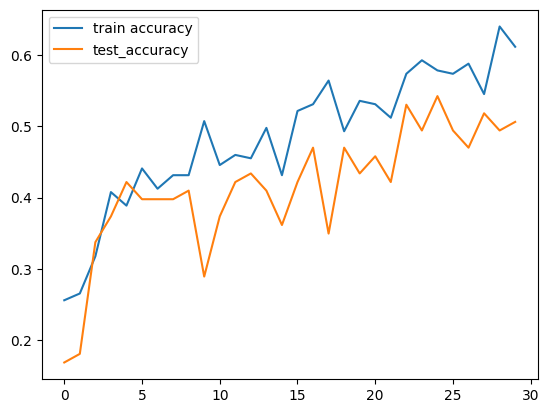

In [ ]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.legend()
plt.show()